In [1]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
x = [[1],[2],[3],[4],]
y = [1.3, 3.6, 4.3, 6.5]


x = np.array(x)
y = np.array(y)

In [3]:
x , y

(array([[1],
        [2],
        [3],
        [4]]),
 array([1.3, 3.6, 4.3, 6.5]))

In [4]:
x.shape, y.shape

((4, 1), (4,))

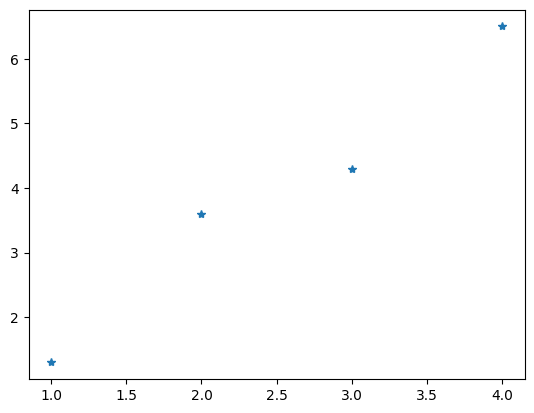

In [5]:
plt.plot(x, y, '*')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
model.coef_[0], model.intercept_

(np.float64(1.63), np.float64(-0.14999999999999947))

In [8]:
model.predict([[10]])

array([16.15])

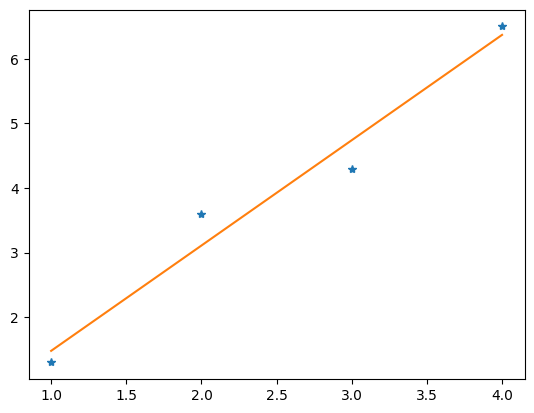

In [9]:
plt.plot(x, y, '*')
plt.plot(x, model.predict(x))
plt.show()

In [10]:
x = np.linspace(1, 360, 360 )
y = np.array([2 * i + (np.random.rand() - 0.5) * 20 for i in x])

x = x.reshape(-1, 1)

In [11]:
model = LinearRegression()
model.fit(x, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


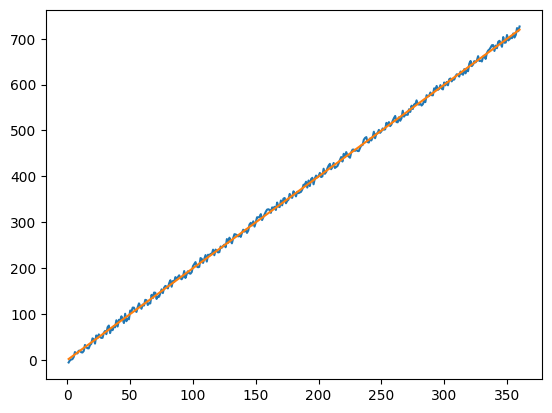

In [12]:
plt.plot(x, y)
plt.plot(x, model.predict(x))
plt.show()

In [13]:
x[0], y[0], model.predict(x[0].reshape(-1, 1))

(array([1.]), np.float64(-5.908708049035482), array([1.67372375]))

In [14]:
x[3], y[3], model.predict(x[3].reshape(-1, 1))

(array([4.]), np.float64(1.2875897747896605), array([7.6757928]))

In [15]:
error = np.array([abs(y[i] - model.predict(x[i].reshape(-1, 1))) for i in range(1, 100)])
mae = np.average(error)

print(mae)


5.324555127576766


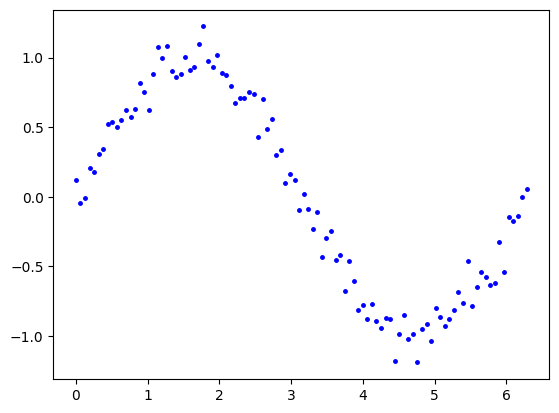

In [16]:
# Generate x values
x = np.linspace(0, 2*np.pi, 100)

# Generate sin values with noise
y = np.sin(x) + np.random.normal(0, 0.1, len(x))

# Create the plot
plt.plot(x, y, 'b.', label='sin(x) + noise', markersize=5)
plt.show()

In [17]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


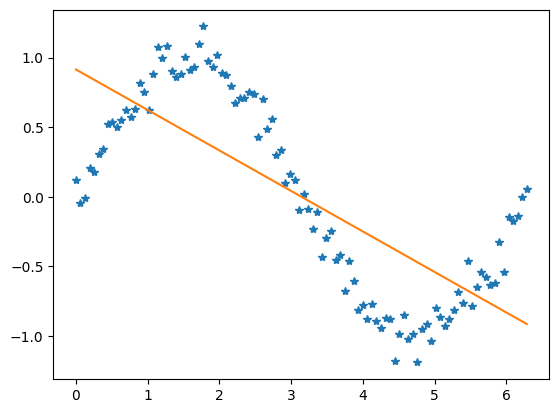

In [18]:
plt.plot(x, y, '*')
plt.plot(x, model.predict(x))
plt.show()

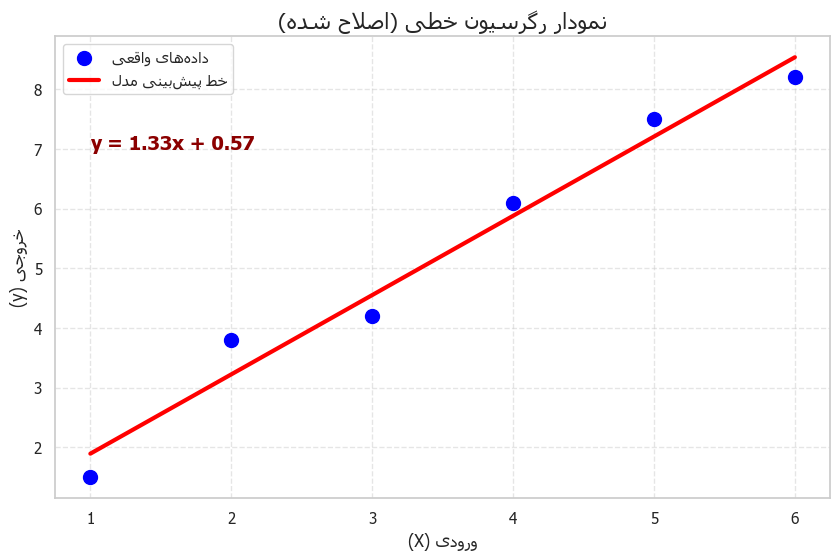

ﺪﺻﺭﺩ 97.3 :ﻝﺪﻣ ﺖﻗﺩ


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- بخش جدید: فارسی‌ساز ---
import arabic_reshaper
from bidi.algorithm import get_display

def fa(text):
    """این تابع متن فارسی را برای نمایش در نمودار اصلاح می‌کند"""
    reshaped_text = arabic_reshaper.reshape(text)  # چسباندن حروف
    bidi_text = get_display(reshaped_text)         # اصلاح جهت راست‌چین
    return bidi_text

# تنظیمات ظاهری
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'  # فونت استاندارد ویندوز

# 1. داده‌ها
X_raw = np.array([[1], [2], [3], [4], [5], [6]])
y_raw = np.array([1.5, 3.8, 4.2, 6.1, 7.5, 8.2])

# 2. مدل‌سازی
model = LinearRegression()
model.fit(X_raw, y_raw)
y_pred = model.predict(X_raw)

# 3. محاسبات
r2 = r2_score(y_raw, y_pred)
equation = f"y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}"

# 4. رسم نمودار اصلاح شده
plt.figure(figsize=(10, 6))

# نقاط و خط با متن فارسی اصلاح شده
plt.scatter(X_raw, y_raw, color='blue', s=100, label=fa('داده‌های واقعی'))
plt.plot(X_raw, y_pred, color='red', linewidth=3, label=fa('خط پیش‌بینی مدل'))

plt.title(fa('نمودار رگرسیون خطی (اصلاح شده)'), fontsize=16)
plt.xlabel(fa('ورودی (X)'), fontsize=12)
plt.ylabel(fa('خروجی (y)'), fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# نمایش فرمول روی نمودار
plt.text(1, 7, equation, fontsize=14, color='darkred', weight='bold')

plt.show()

print(fa(f"دقت مدل: {r2*100:.1f} درصد"))

✅ فایل داده‌ها بارگذاری شد:
   Area  Rooms  Age  Price
0    60      1   15    1.5
1    75      2   10    3.8
2    85      2    8    4.2
3   100      3    5    6.1
4   120      3    2    7.5


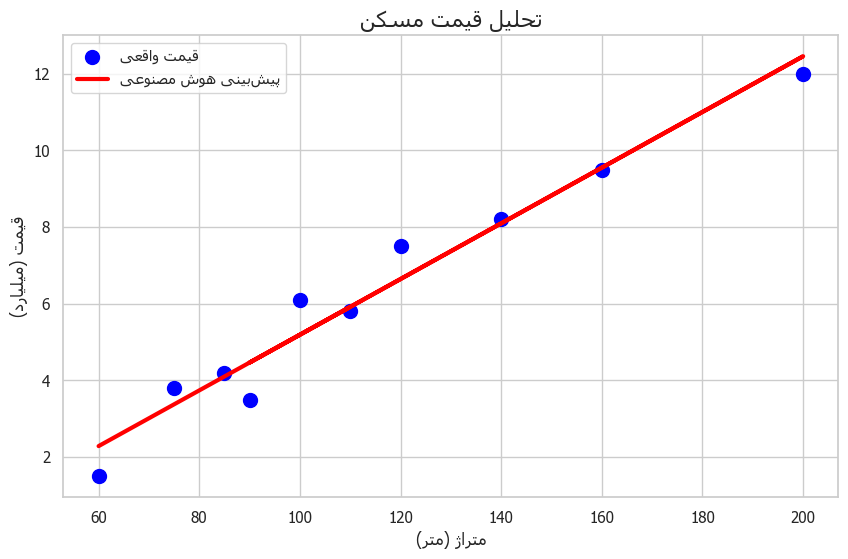

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import arabic_reshaper
from bidi.algorithm import get_display

# تنظیمات فارسی و گرافیکی
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'

# 1. خواندن فایل داده
try:
    df = pd.read_csv('data.csv')
    print("✅ فایل داده‌ها بارگذاری شد:")
    print(df.head()) # نمایش ۵ خط اول
except:
    print("❌ خطا: فایل data.csv پیدا نشد! لطفا فایل را بسازید.")

# 2. آماده‌سازی برای هوش مصنوعی
X = df[['Area']] # ورودی: متراژ
y = df['Price']  # خروجی: قیمت

# 3. آموزش مدل
model = LinearRegression()
model.fit(X, y)
prediction = model.predict(X)

# 4. رسم نمودار
plt.figure(figsize=(10, 6))
plt.scatter(df['Area'], df['Price'], color='blue', s=100, label=fa('قیمت واقعی'))
plt.plot(df['Area'], prediction, color='red', linewidth=3, label=fa('پیش‌بینی هوش مصنوعی'))

plt.title(fa('تحلیل قیمت مسکن'), fontsize=16)
plt.xlabel(fa('متراژ (متر)'), fontsize=12)
plt.ylabel(fa('قیمت (میلیارد)'), fontsize=12)
plt.legend()
plt.show()

c:\Users\SilentGalaxy\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\SilentGalaxy\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


----------------------------------------
ﺮﺘﻣ 135 :ﺎﻤﺷ ﺮﻈﻧ ﺩﺭﻮﻣ ﮊﺍﺮﺘﻣ 🏠
ﻥﺎﻣﻮﺗ ﺩﺭﺎﯿﻠﯿﻣ 7.79 :ﻩﺪﺷ ﯽﻨﯿﺑﺶﯿﭘ ﺖﻤﯿﻗ 💰
%2619.7- :ﺖﺴﺗ ﯼﺎﻫﻩﺩﺍﺩ ﺭﺩ ﻝﺪﻣ ﺖﻗﺩ 📊
----------------------------------------


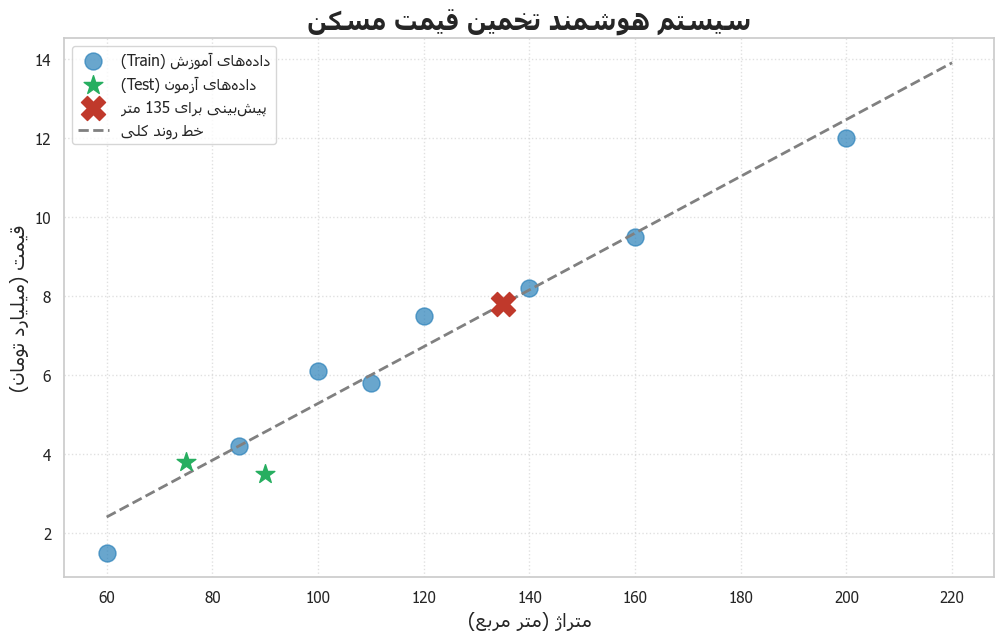

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import arabic_reshaper
from bidi.algorithm import get_display

# --- تابع فارسی‌ساز ---
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'

# ==========================================
# 1. تنظیمات ورودی کاربر (اینجا رو می‌تونی تغییر بدی)
# ==========================================
NEW_HOUSE_SIZE = 135  # مثلا: می‌خوایم قیمت یک خونه ۱۳۵ متری رو پیش‌بینی کنیم

# ==========================================
# 2. بارگذاری و آماده‌سازی داده‌ها
# ==========================================
try:
    df = pd.read_csv('data.csv')
    X = df[['Area']]
    y = df['Price']
    
    # تقسیم داده‌ها: ۸۰٪ برای آموزش، ۲۰٪ برای امتحان
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
except:
    print("❌ خطا: فایل data.csv یافت نشد.")
    X, y = np.array([[1]]), np.array([1])

# ==========================================
# 3. آموزش مدل (فقط با داده‌های آموزشی)
# ==========================================
model = LinearRegression()
model.fit(X_train, y_train)

# ==========================================
# 4. پیش‌بینی و ارزیابی
# ==========================================
# پیش‌بینی قیمت خانه مورد نظر شما
predicted_price = model.predict([[NEW_HOUSE_SIZE]])[0]

# محاسبه دقت مدل روی داده‌های تست (امتحان واقعی)
test_score = model.score(X_test, y_test)

# ==========================================
# 5. گزارش متنی
# ==========================================
print("-" * 40)
print(fa(f"🏠 متراژ مورد نظر شما: {NEW_HOUSE_SIZE} متر"))
print(fa(f"💰 قیمت پیش‌بینی شده: {predicted_price:.2f} میلیارد تومان"))
print(fa(f"📊 دقت مدل در داده‌های تست: {test_score*100:.1f}%"))
print("-" * 40)

# ==========================================
# 6. رسم نمودار پیشرفته
# ==========================================
plt.figure(figsize=(12, 7))

# رسم داده‌های آموزش (آبی)
plt.scatter(X_train, y_train, color='#2980b9', s=150, label=fa('داده‌های آموزش (Train)'), alpha=0.7)

# رسم داده‌های تست (سبز) - این‌ها را مدل ندیده بود
plt.scatter(X_test, y_test, color='#27ae60', s=200, marker='*', label=fa('داده‌های آزمون (Test)'), zorder=5)

# رسم نقطه پیش‌بینی شده جدید (قرمز)
plt.scatter([NEW_HOUSE_SIZE], [predicted_price], color='#c0392b', s=300, marker='X', label=fa(f'پیش‌بینی برای {NEW_HOUSE_SIZE} متر'), zorder=10)

# خط رگرسیون (روی کل دامنه)
x_range = np.linspace(X.min(), X.max() + 20, 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='gray', linestyle='--', linewidth=2, label=fa('خط روند کلی'))

plt.title(fa('سیستم هوشمند تخمین قیمت مسکن'), fontsize=18, fontweight='bold')
plt.xlabel(fa('متراژ (متر مربع)'), fontsize=14)
plt.ylabel(fa('قیمت (میلیارد تومان)'), fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

✅ داده‌های چند متغیره بارگذاری شد.


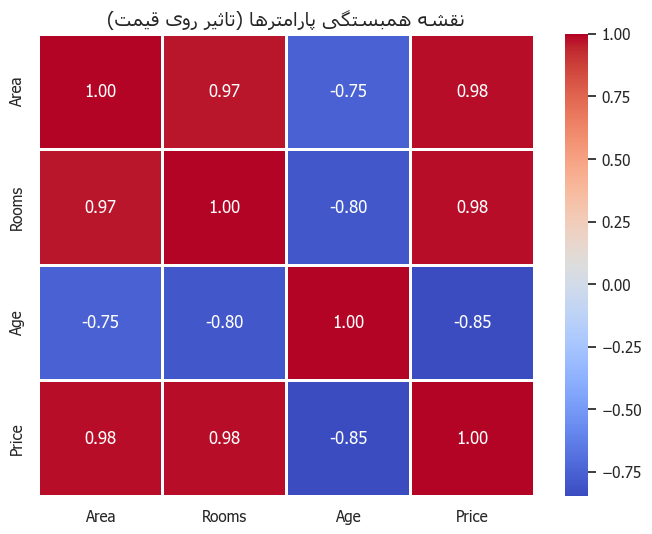

ﺖﺧﺎﺳ ﻝﺎﺳ 5 ،ﻪﺑﺍﻮﺧ 3 ،ﺮﺘﻣ 135 :ﺕﺎﺼﺨﺸﻣ 📋
ﻥﺎﻣﻮﺗ ﺩﺭﺎﯿﻠﯿﻣ 7.303 :ﯽﻋﻮﻨﺼﻣ ﺵﻮﻫ ﻩﺪﺷ ﯽﺳﺎﻨﺷﺭﺎﮐ ﺖﻤﯿﻗ 💎


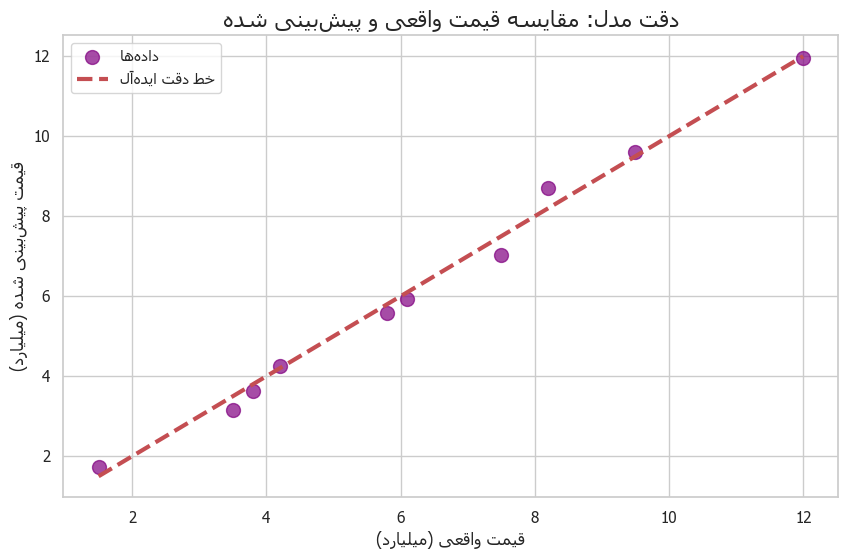

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import arabic_reshaper
from bidi.algorithm import get_display

# --- تابع فارسی‌ساز ---
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Tahoma'

# ==========================================
# 1. تنظیمات ورودی شما (خانه رویایی‌تان را توصیف کنید)
# ==========================================
MY_AREA = 135   # متراژ
MY_ROOMS = 3    # تعداد اتاق
MY_AGE = 5      # سن بنا (سال)

# ==========================================
# 2. بارگذاری داده‌های جدید
# ==========================================
try:
    df = pd.read_csv('data.csv')
    print("✅ داده‌های چند متغیره بارگذاری شد.")
    
    # ورودی‌ها (X) الان ۳ تا هستند
    X = df[['Area', 'Rooms', 'Age']]
    y = df['Price']
    
    # تقسیم داده‌ها
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

except:
    print("❌ خطا در خواندن فایل.")

# ==========================================
# 3. تحلیل همبستگی (Heatmap) - ویژگی جدید!
# ==========================================
# این نمودار نشان می‌دهد کدام پارامترها با هم رابطه قوی دارند
plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title(fa('نقشه همبستگی پارامترها (تاثیر روی قیمت)'), fontsize=14)
plt.show()

# ==========================================
# 4. آموزش و پیش‌بینی
# ==========================================
model = LinearRegression()
model.fit(X_train, y_train)

# پیش‌بینی برای ورودی‌های شما
input_data = pd.DataFrame([[MY_AREA, MY_ROOMS, MY_AGE]], columns=['Area', 'Rooms', 'Age'])
predicted_price = model.predict(input_data)[0]

print("=" * 50)
print(fa(f"📋 مشخصات: {MY_AREA} متر، {MY_ROOMS} خوابه، {MY_AGE} سال ساخت"))
print(fa(f"💎 قیمت کارشناسی شده هوش مصنوعی: {predicted_price:.3f} میلیارد تومان"))
print("=" * 50)

# ==========================================
# 5. نمودار مقایسه (واقعیت vs پیش‌بینی)
# ==========================================
# چون نمی‌توانیم نمودار ۴ بعدی بکشیم، "قیمت واقعی" را با "قیمت پیش‌بینی شده" مقایسه می‌کنیم
y_pred_all = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_all, color='purple', s=100, alpha=0.7, label=fa('داده‌ها'))

# خط ایده‌آل (جایی که پیش‌بینی دقیقاً برابر واقعیت است)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3, label=fa('خط دقت ایده‌آل'))

plt.title(fa('دقت مدل: مقایسه قیمت واقعی و پیش‌بینی شده'), fontsize=16)
plt.xlabel(fa('قیمت واقعی (میلیارد)'), fontsize=12)
plt.ylabel(fa('قیمت پیش‌بینی شده (میلیارد)'), fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [23]:
import pandas as pd
import numpy as np

# تنظیمات تولید داده تصادفی (ولی منطقی)
np.random.seed(42)
n_samples = 500

# 1. تولید متراژ (بین ۵۰ تا ۴۰۰ متر)
area = np.random.randint(50, 400, n_samples)

# 2. تولید تعداد اتاق (بین ۱ تا ۶ خواب)
# منطق: خونه‌های بزرگتر معمولا اتاق بیشتر دارند
rooms = (area // 70) + np.random.randint(0, 2, n_samples) 

# 3. تولید سن بنا (بین ۰ تا ۳۰ سال)
age = np.random.randint(0, 30, n_samples)

# 4. فرمول سری قیمت (این فرمولیه که ماشین باید کشف کنه!)
# قیمت پایه + (متراژ * ۵۰) + (اتاق * ۳۰۰) - (سن * ۲۰) + کمی نویز بازار
base_price = 500 # قیمت پایه (مثلا ۵۰۰ میلیون)
price = base_price + (area * 0.08) + (rooms * 0.5) - (age * 0.1) + np.random.normal(0, 0.5, n_samples)

# ذخیره در فایل
df = pd.DataFrame({'Area': area, 'Rooms': rooms, 'Age': age, 'Price': price})
df.to_csv('house_data_500.csv', index=False)

print("✅ فایل house_data_500.csv با ۵۰۰ داده نمونه ساخته شد!")

✅ فایل house_data_500.csv با ۵۰۰ داده نمونه ساخته شد!


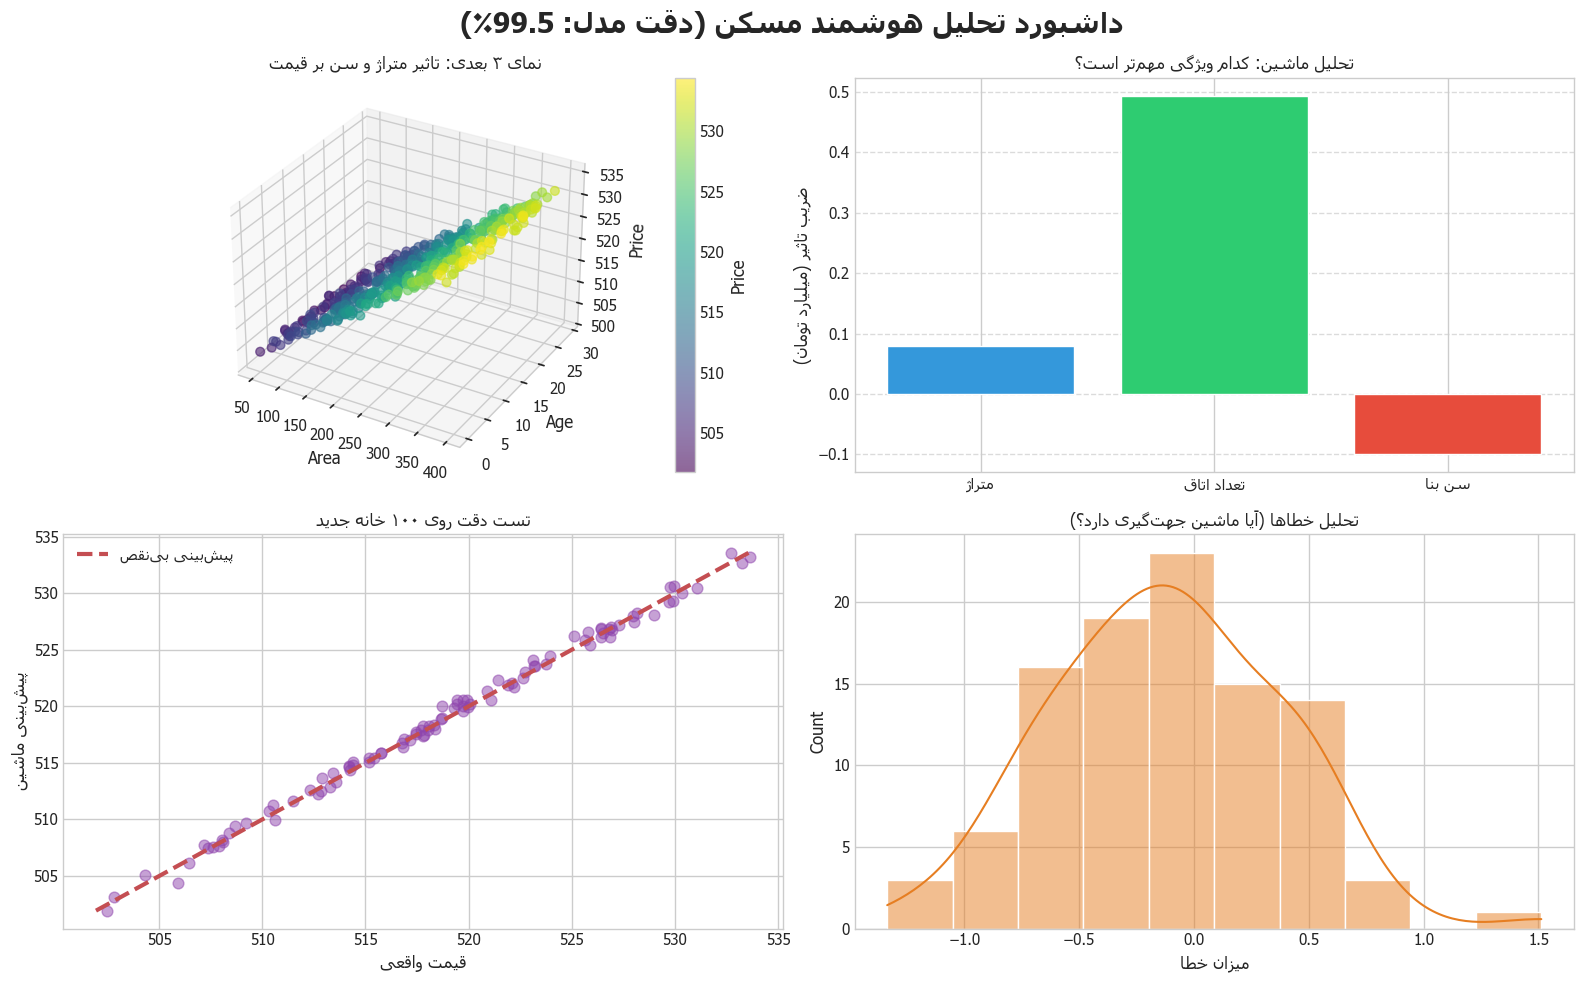

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import arabic_reshaper
from bidi.algorithm import get_display

# --- تنظیمات فارسی و گرافیکی ---
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

plt.style.use('seaborn-v0_8-whitegrid') # استایل مدرن
plt.rcParams['font.family'] = 'Tahoma'

# ==========================================
# 1. بارگذاری داده‌های انبوه
# ==========================================
try:
    df = pd.read_csv('house_data_500.csv')
    X = df[['Area', 'Rooms', 'Age']]
    y = df['Price']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # آموزش مدل
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
except FileNotFoundError:
    print("❌ فایل داده پیدا نشد. لطفا کد مرحله اول را اجرا کنید.")

# ==========================================
# 2. طراحی داشبورد (Dashboard Layout)
# ==========================================
fig = plt.figure(figsize=(16, 10))
fig.suptitle(fa(f'داشبورد تحلیل هوشمند مسکن (دقت مدل: {score*100:.1f}٪)'), fontsize=20, weight='bold')

# --- نمودار ۱: فضای سه بعدی (Area, Age, Price) ---
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
sc = ax1.scatter(df['Area'], df['Age'], df['Price'], c=df['Price'], cmap='viridis', s=40, alpha=0.6)
ax1.set_xlabel('Area')
ax1.set_ylabel('Age')
ax1.set_zlabel('Price')
ax1.set_title(fa('نمای ۳ بعدی: تاثیر متراژ و سن بر قیمت'), fontsize=12)
plt.colorbar(sc, ax=ax1, label='Price', pad=0.1)

# --- نمودار ۲: اهمیت ویژگی‌ها (Feature Importance) ---
# ماشین چقدر به هر پارامتر اهمیت داده؟
ax2 = fig.add_subplot(2, 2, 2)
importance = model.coef_
features = [fa('متراژ'), fa('تعداد اتاق'), fa('سن بنا')]
colors = ['#3498db', '#2ecc71', '#e74c3c']
ax2.bar(features, importance, color=colors)
ax2.set_title(fa('تحلیل ماشین: کدام ویژگی مهم‌تر است؟'), fontsize=12)
ax2.set_ylabel(fa('ضریب تاثیر (میلیارد تومان)'))
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# --- نمودار ۳: مقایسه واقعی vs پیش‌بینی (روی ۵۰۰ داده) ---
ax3 = fig.add_subplot(2, 2, 3)
ax3.scatter(y_test, y_pred, color='#8e44ad', alpha=0.5, s=60)
# خط ایده آل
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax3.plot([min_val, max_val], [min_val, max_val], 'r--', lw=3, label=fa('پیش‌بینی بی‌نقص'))
ax3.set_xlabel(fa('قیمت واقعی'))
ax3.set_ylabel(fa('پیش‌بینی ماشین'))
ax3.set_title(fa('تست دقت روی ۱۰۰ خانه جدید'), fontsize=12)
ax3.legend()

# --- نمودار ۴: توزیع خطاها (Residuals) ---
# خطاها باید نرمال باشند (شکل زنگوله)
ax4 = fig.add_subplot(2, 2, 4)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='#e67e22', ax=ax4)
ax4.set_title(fa('تحلیل خطاها (آیا ماشین جهت‌گیری دارد؟)'), fontsize=12)
ax4.set_xlabel(fa('میزان خطا'))

plt.tight_layout()
plt.show()

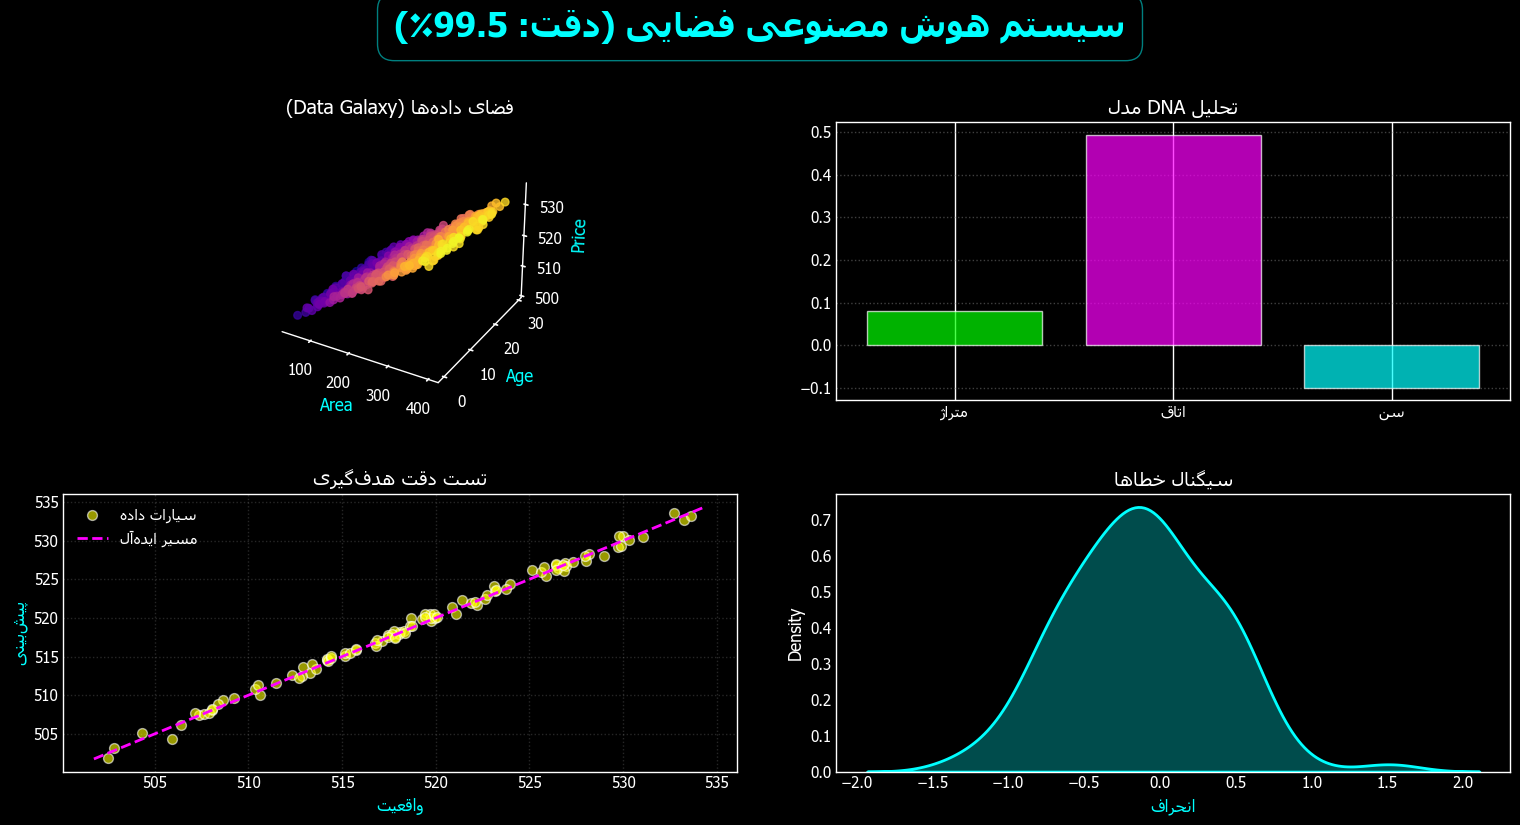

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image
import requests
from io import BytesIO

# ==========================================
# 0. تنظیمات گرافیکی فضایی (Space UI)
# ==========================================
# تم تاریک برای کل محیط
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Tahoma'

# تابع فارسی‌ساز
def fa(text):
    return get_display(arabic_reshaper.reshape(text))

# دانلود تصویر کهکشان برای پس‌زمینه
def get_galaxy_bg():
    url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/NGC_4414_%28NASA-med%29.jpg/1200px-NGC_4414_%28NASA-med%29.jpg"
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

# ==========================================
# 1. تولید داده و مدل‌سازی (Backend)
# ==========================================
# تولید داده‌های تصادفی (اگر فایل نباشد)
np.random.seed(42)
n_samples = 500
area = np.random.randint(50, 400, n_samples)
rooms = (area // 70) + np.random.randint(0, 2, n_samples)
age = np.random.randint(0, 30, n_samples)
price = 500 + (area * 0.08) + (rooms * 0.5) - (age * 0.1) + np.random.normal(0, 0.5, n_samples)
df = pd.DataFrame({'Area': area, 'Rooms': rooms, 'Age': age, 'Price': price})

# آموزش مدل
X = df[['Area', 'Rooms', 'Age']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

# ==========================================
# 2. طراحی داشبورد کهکشانی (Frontend)
# ==========================================
fig = plt.figure(figsize=(16, 9))

# --- تنظیم پس‌زمینه کهکشانی ---
try:
    galaxy_img = get_galaxy_bg()
    # قرار دادن عکس در کل صفحه
    newax = fig.add_axes([0, 0, 1, 1], zorder=-1)
    newax.imshow(galaxy_img, aspect='auto')
    newax.axis('off')
except:
    fig.patch.set_facecolor('black') # اگر اینترنت نبود، مشکی شود

# عنوان اصلی با رنگ نئون
fig.suptitle(fa(f'سیستم هوش مصنوعی فضایی (دقت: {score*100:.1f}٪)'), 
             fontsize=24, color='#00FFFF', weight='bold', y=0.95, 
             bbox=dict(facecolor='black', alpha=0.5, edgecolor='#00FFFF', boxstyle='round,pad=0.5'))

# --- نمودار ۱: ۳ بعدی (بنفش و نارنجی) ---
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.set_facecolor('none') # شیشه‌ای
# حذف صفحات خاکستری پشت نمودار ۳ بعدی برای دیدن ستاره‌ها
ax1.xaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax1.yaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax1.zaxis.set_pane_color((0.0, 0.0, 0.0, 0.0))
ax1.grid(False) # حذف خطوط مزاحم

sc = ax1.scatter(df['Area'], df['Age'], df['Price'], c=df['Price'], cmap='plasma', s=30, alpha=0.8)
ax1.set_xlabel('Area', color='cyan')
ax1.set_ylabel('Age', color='cyan')
ax1.set_zlabel('Price', color='cyan')
ax1.set_title(fa('فضای داده‌ها (Data Galaxy)'), color='white', fontsize=14)

# --- نمودار ۲: اهمیت ویژگی‌ها (سبز نئونی) ---
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_facecolor('none') # شیشه‌ای
features = [fa('متراژ'), fa('اتاق'), fa('سن')]
importance = model.coef_
bars = ax2.bar(features, importance, color=['#00ff00', '#ff00ff', '#00ffff'], alpha=0.7)
ax2.set_title(fa('تحلیل DNA مدل'), color='white', fontsize=14)
ax2.grid(axis='y', linestyle=':', color='gray', alpha=0.5)
# رنگ متن محورها
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')

# --- نمودار ۳: پیش‌بینی (زرد درخشان) ---
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_facecolor('none')
ax3.scatter(y_test, y_pred, color='#FFFF00', s=50, alpha=0.6, edgecolors='white', label=fa('سیارات داده'))
ax3.plot([y.min(), y.max()], [y.min(), y.max()], color='#FF00FF', lw=2, linestyle='--', label=fa('مسیر ایده‌آل'))
ax3.set_title(fa('تست دقت هدف‌گیری'), color='white', fontsize=14)
ax3.set_xlabel(fa('واقعیت'), color='cyan')
ax3.set_ylabel(fa('پیش‌بینی'), color='cyan')
ax3.legend(facecolor='black', edgecolor='white')
ax3.grid(color='gray', linestyle=':', alpha=0.3)

# --- نمودار ۴: رادار اسکن خطا (توزیع) ---
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_facecolor('none')
residuals = y_test - y_pred
sns.kdeplot(residuals, fill=True, color='#00FFFF', alpha=0.3, ax=ax4, linewidth=2)
ax4.set_title(fa('سیگنال خطاها'), color='white', fontsize=14)
ax4.set_xlabel(fa('انحراف'), color='cyan')
ax4.grid(False)

plt.tight_layout(pad=3.0)
plt.show()

⚠️ تصویر لود نشد (اینترنت؟). تولید ستاره‌های مصنوعی...


C:\Users\SilentGalaxy\AppData\Local\Temp\ipykernel_22328\2085039735.py:164: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=3.0)
c:\Users\SilentGalaxy\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65250 (\N{ARABIC LETTER MEEM FINAL FORM}) missing from font(s) Consolas.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SilentGalaxy\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65176 (\N{ARABIC LETTER TEH MEDIAL FORM}) missing from font(s) Consolas.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SilentGalaxy\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65204 (\N{ARABIC LETTER SEEN MEDIAL FORM}) missing from font(s) Consolas.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\SilentGalaxy\AppData\Local\Python\p

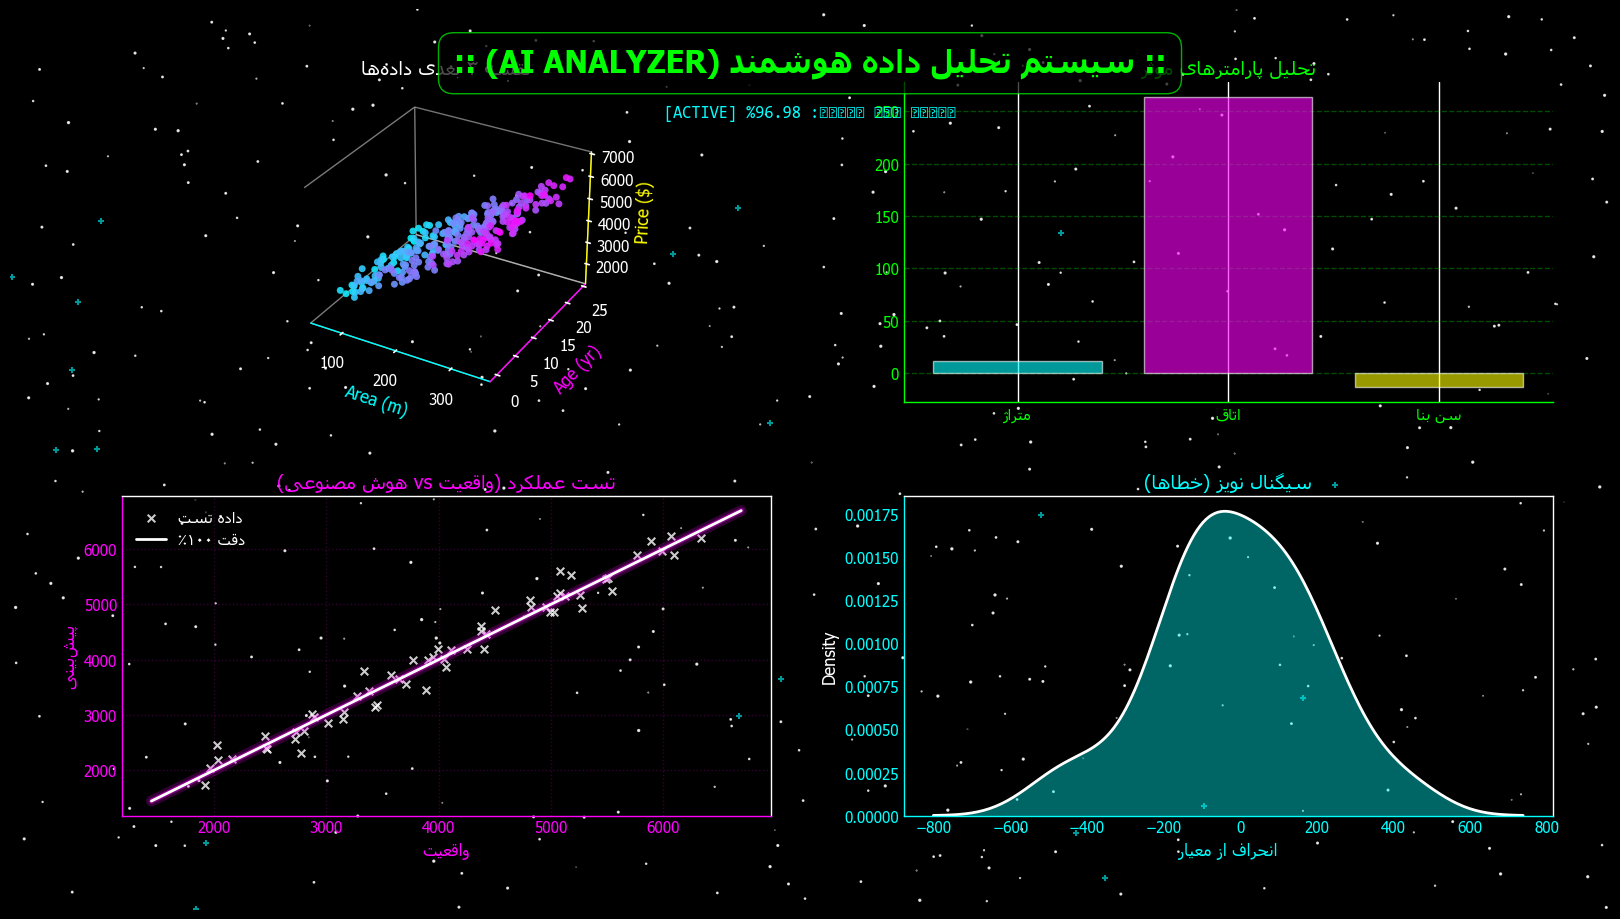

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import arabic_reshaper
from bidi.algorithm import get_display
from PIL import Image
import requests
from io import BytesIO

# ==========================================
# 0. تنظیمات گرافیکی نئونی (Neon Space UI)
# ==========================================
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Tahoma'

def fa(text):
    return get_display(arabic_reshaper.reshape(text))

# تابع ایجاد افکت درخشش (Glow)
def plot_glow(ax, x, y, color, label=None, linewidth=2):
    # رسم هاله نور (ضخیم و کم‌رنگ)
    ax.plot(x, y, color=color, linewidth=linewidth*4, alpha=0.2)
    ax.plot(x, y, color=color, linewidth=linewidth*2, alpha=0.4)
    # رسم خط اصلی (نازک و پررنگ)
    ax.plot(x, y, color='white', linewidth=linewidth, label=label)

# تابع تولید پس‌زمینه ستاره‌ای (اگر عکس لود نشد)
def create_starfield(ax):
    import random
    ax.set_facecolor('black')
    # تولید ۵۰۰ ستاره تصادفی
    x_stars = [random.random() for _ in range(500)]
    y_stars = [random.random() for _ in range(500)]
    sizes = [random.random() * 2 for _ in range(500)] # اندازه متفاوت
    # ستاره‌های سفید و آبی کمرنگ
    ax.scatter(x_stars, y_stars, s=sizes, c='white', alpha=0.8, transform=ax.transAxes, zorder=-10)
    # چند ستاره بزرگ و درخشان
    x_big = [random.random() for _ in range(20)]
    y_big = [random.random() for _ in range(20)]
    ax.scatter(x_big, y_big, s=20, c='cyan', alpha=0.6, marker='+', transform=ax.transAxes, zorder=-10)

# دریافت تصویر آنلاین (با بکاپ دستی)
def set_background(fig):
    try:
        # لینک تصویر با کیفیت هابل
        url = "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg/1280px-The_Sun_by_the_Atmospheric_Imaging_Assembly_of_NASA%27s_Solar_Dynamics_Observatory_-_20100819.jpg"
        response = requests.get(url, timeout=3)
        img = Image.open(BytesIO(response.content))
        newax = fig.add_axes([0, 0, 1, 1], zorder=-20)
        newax.imshow(img, aspect='auto', alpha=0.4) # کمی تاریک‌تر
        newax.axis('off')
        print("✅ تصویر آنلاین فضایی لود شد.")
    except:
        print("⚠️ تصویر لود نشد (اینترنت؟). تولید ستاره‌های مصنوعی...")
        # اگر عکس نیامد، کل صفحه ستاره‌باران شود
        bg_ax = fig.add_axes([0, 0, 1, 1], zorder=-20)
        create_starfield(bg_ax)
        bg_ax.axis('off')

# ==========================================
# 1. داده‌سازی و مدل (Backend)
# ==========================================
np.random.seed(42)
n_samples = 300
area = np.random.randint(60, 350, n_samples)
rooms = (area // 80) + np.random.randint(1, 3, n_samples)
age = np.random.randint(0, 25, n_samples)
price = 800 + (area * 12) + (rooms * 250) - (age * 15) + np.random.normal(0, 200, n_samples)
df = pd.DataFrame({'Area': area, 'Rooms': rooms, 'Age': age, 'Price': price})

X = df[['Area', 'Rooms', 'Age']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)

# ==========================================
# 2. طراحی داشبورد Sci-Fi (Frontend)
# ==========================================
fig = plt.figure(figsize=(16, 9))
set_background(fig) # اعمال پس‌زمینه

# کادر عنوان سیستم
fig.text(0.5, 0.93, fa(f':: سیستم تحلیل داده هوشمند (AI ANALYZER) ::'), 
         fontsize=22, color='#00FF00', weight='bold', ha='center',
         bbox=dict(facecolor='black', edgecolor='#00FF00', alpha=0.7, boxstyle='round,pad=0.5'))

fig.text(0.5, 0.88, fa(f'وضعیت دقت سیستم: {score*100:.2f}% [ACTIVE]'), 
         fontsize=12, color='cyan', ha='center', fontfamily='Consolas')

# --- نمودار ۱: ۳ بعدی (هولوگرافیک) ---
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.set_facecolor('none')
ax1.grid(False)
# حذف دیواره‌ها
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
# محورهای رنگی
ax1.xaxis.line.set_color('cyan')
ax1.yaxis.line.set_color('magenta')
ax1.zaxis.line.set_color('yellow')

p = ax1.scatter(df['Area'], df['Age'], df['Price'], c=df['Price'], cmap='cool', s=25, alpha=0.9, edgecolors='none')
ax1.set_xlabel('Area (m)', color='cyan')
ax1.set_ylabel('Age (yr)', color='magenta')
ax1.set_zlabel('Price ($)', color='yellow')
ax1.set_title(fa('نقشه ۳ بعدی داده‌ها'), color='white', fontsize=14)

# --- نمودار ۲: تحلیل ضرایب (بارکد نئونی) ---
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_facecolor('none')
importance = model.coef_
features = [fa('متراژ'), fa('اتاق'), fa('سن بنا')]
# میله‌های درخشان
bars = ax2.bar(features, importance, color=['#00FFFF', '#FF00FF', '#FFFF00'], alpha=0.6, edgecolor='white')
ax2.set_title(fa('تحلیل پارامترهای موثر'), color='#00FF00', fontsize=14)
ax2.grid(axis='y', color='#00FF00', linestyle='--', alpha=0.3)
# رنگ محورها
ax2.spines['bottom'].set_color('#00FF00')
ax2.spines['top'].set_color('none') 
ax2.spines['right'].set_color('none')
ax2.spines['left'].set_color('#00FF00')
ax2.tick_params(colors='#00FF00')

# --- نمودار ۳: پیش‌بینی (لیزر اسکن) ---
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_facecolor('none')
ax3.scatter(y_test, y_pred, color='white', s=30, marker='x', alpha=0.8, label=fa('داده تست'))
# خط لیزری
plot_glow(ax3, [y.min(), y.max()], [y.min(), y.max()], color='#FF00FF', label=fa('دقت ۱۰۰٪'))

ax3.set_title(fa('تست عملکرد (واقعیت vs هوش مصنوعی)'), color='magenta', fontsize=14)
ax3.set_xlabel(fa('واقعیت'), color='magenta')
ax3.set_ylabel(fa('پیش‌بینی'), color='magenta')
ax3.legend(facecolor='black', edgecolor='magenta', labelcolor='white')
ax3.grid(color='magenta', linestyle=':', alpha=0.2)
ax3.tick_params(colors='magenta')
ax3.spines['bottom'].set_color('magenta')
ax3.spines['left'].set_color('magenta')

# --- نمودار ۴: رادار (توزیع خطا) ---
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_facecolor('none')
residuals = y_test - y_pred
# رسم نمودار توزیع با رنگ پر
sns.kdeplot(residuals, fill=True, color='#00FFFF', alpha=0.4, ax=ax4, linewidth=0)
# خط دورش نئونی
sns.kdeplot(residuals, color='white', ax=ax4, linewidth=2)

ax4.set_title(fa('سیگنال نویز (خطاها)'), color='cyan', fontsize=14)
ax4.set_xlabel(fa('انحراف از معیار'), color='cyan')
ax4.grid(False)
ax4.tick_params(colors='cyan')
ax4.spines['bottom'].set_color('cyan')
ax4.spines['left'].set_color('cyan')

plt.tight_layout(pad=3.0)
plt.show()